In [1]:
%%capture capt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.15.0
Eager mode:  True
GPU is NOT AVAILABLE


In [3]:
from TSNE_code.TSNE_utils import TSNE
from sklearn.manifold import TSNE as sk_TSNE

# Load trained model

In [4]:
%%capture capt
model = tf.keras.models.load_model('model.h5')

In [5]:
embedding = model.layers[0].get_weights()[0]
print(f"Embedding shape: {embedding.shape}")

Embedding shape: (5000, 256)


# Scikit-learn t-SNE

In [6]:
tsne = sk_TSNE(n_components=2, n_jobs=-1)
embedded_data = tsne.fit_transform(embedding)

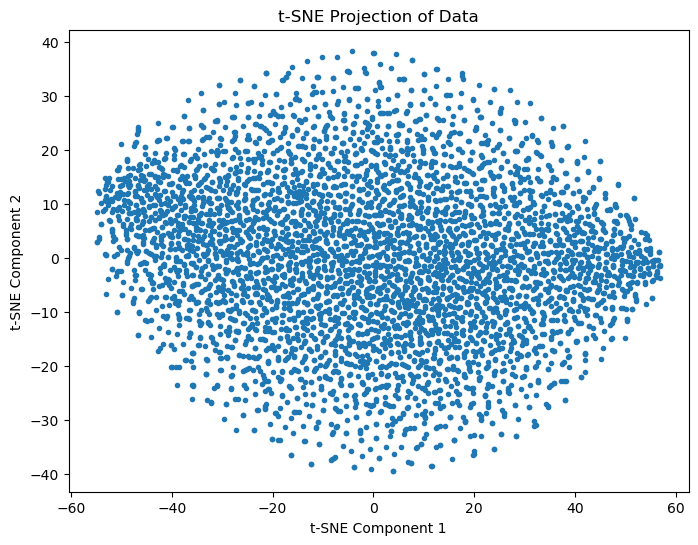

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], marker='.')
plt.title('t-SNE Projection of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Custom t-SNE

### Without Delta-bar-delta adaptive learning rate

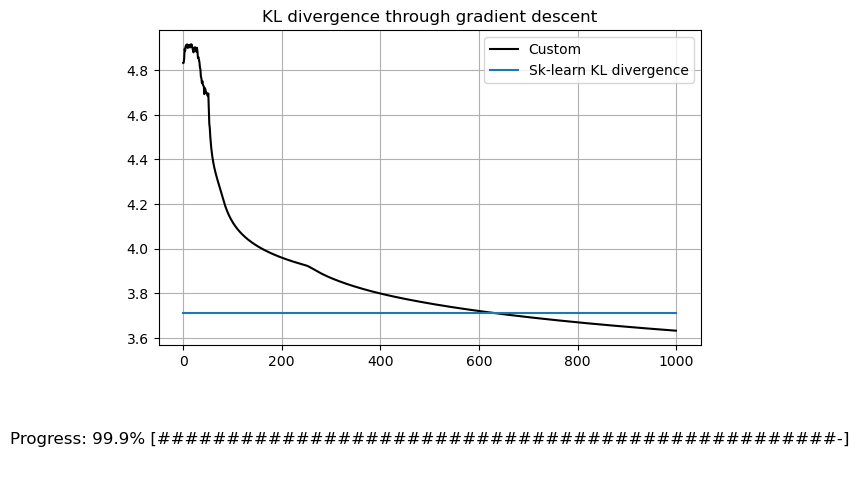

In [8]:
t = TSNE(n_components=2, perplexity=30, adaptive_learning_rate=False, patience=50, n_iter=1000)
low_dim_embedding = t.fit_transform(embedding, reference_kl_divergence=tsne.kl_divergence_,
                                                   title='Sk-learn KL divergence', verbose=3)

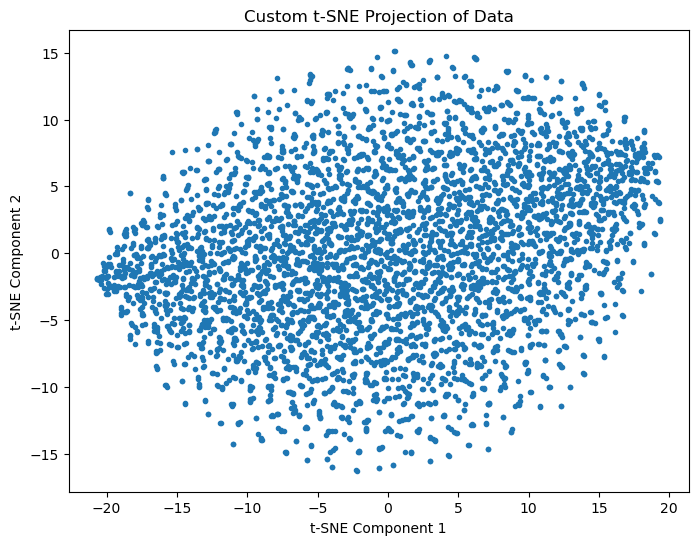

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(low_dim_embedding[:, 0], low_dim_embedding[:, 1], marker='.')
plt.title('Custom t-SNE Projection of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### With Delta-bar-delta adaptive learning rate

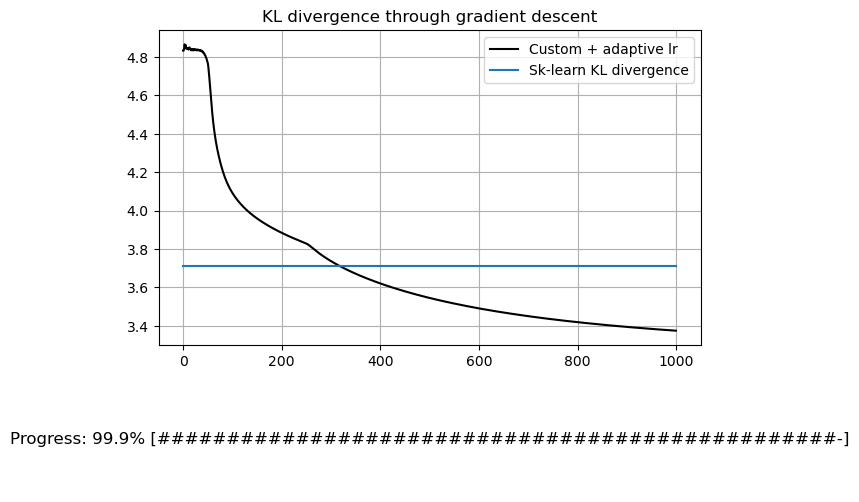

In [10]:
t_no_adpt = TSNE(n_components=2, perplexity=30, adaptive_learning_rate=True, patience=50, n_iter=1000)
low_dim_embedding_no_adpt = t_no_adpt.fit_transform(embedding, reference_kl_divergence=tsne.kl_divergence_,
                                                   title='Sk-learn KL divergence', verbose=3)

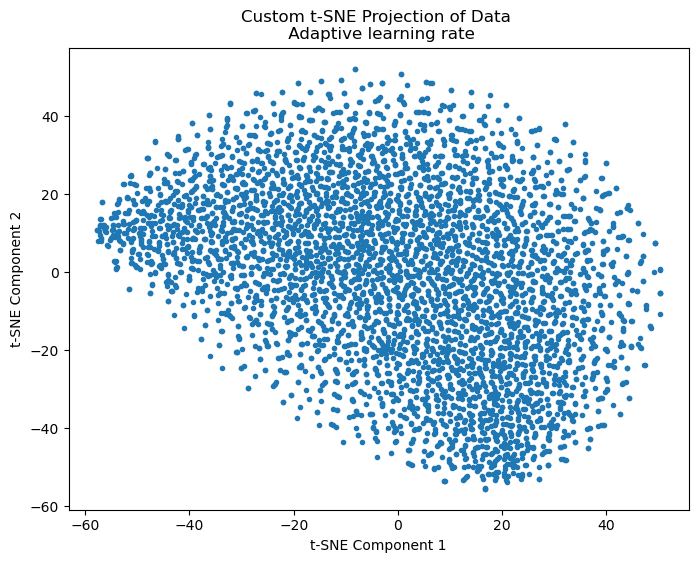

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(low_dim_embedding_no_adpt[:, 0], low_dim_embedding_no_adpt[:, 1], marker='.')
plt.title('Custom t-SNE Projection of Data \n Adaptive learning rate')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### Visual comparison with UMAP

#### UMAP

UMAP (Uniform Manifold Approximation and Projection), is a dimensionality reduction technique commonly used in machine learning and data analysis. Similar to t-SNE, UMAP is designed to visualize high-dimensional data in a lower-dimensional space while preserving the underlying structure of the data. However, there are notable differences between UMAP and tSNE :

- Optimization approach: tSNE minimizes the divergence between probability distributions, while UMAP minimizes the fuzzy set cross entropy.
- UMAP tends to be computationally efficient and scalable, making it well-suited for large datasets, whereas tSNE may become impractical due to its higher computational cost.

Despite these differences, both UMAP and tSNE serve as valuable tools for exploring and understanding complex datasets in a more interpretable manner.

In [12]:
from umap.umap_ import UMAP

In [13]:
fit = UMAP()
u = fit.fit_transform(embedding)

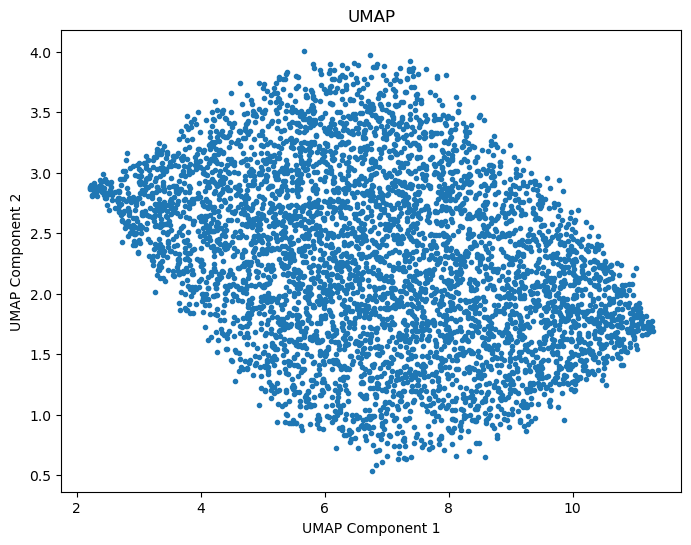

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(u[:,0], u[:,1],  marker='.')
plt.title('UMAP')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

## Perplexity tuning

In [15]:
perplexities = range(5, 55, 5)

kl_divergences = []
tsne_s = []
embeddings = []
best_kl_divergence = None
best_perplexity = None

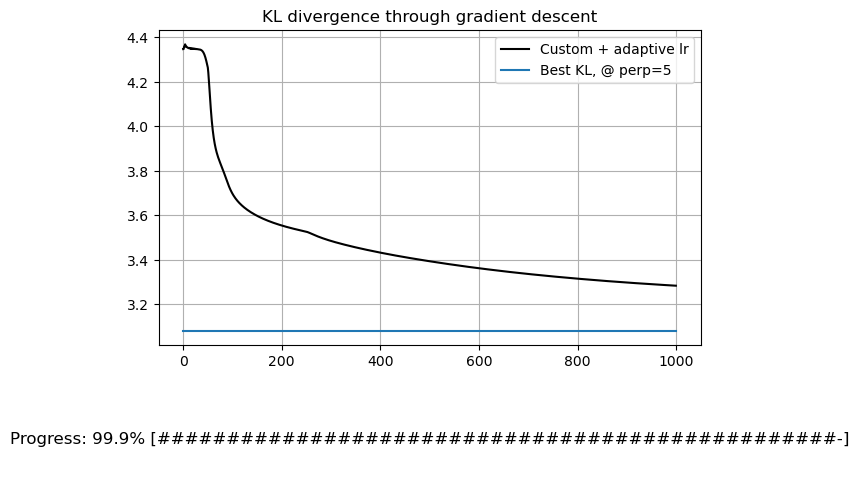

In [16]:
for perplexity in perplexities:
    print(f'Computing perplexity = {perplexity}')
    tsne__loop = TSNE(n_components=2, perplexity=perplexity, adaptive_learning_rate=True, patience=50, n_iter=1000)
    low_dim_embedding__loop = tsne__loop.fit_transform(embedding, reference_kl_divergence=best_kl_divergence,
                                                   title=f'Best KL, @ perp={best_perplexity}', verbose=3)
    
    if best_kl_divergence is None or tsne__loop.kl_divergence[-1] < best_kl_divergence:
        best_kl_divergence = tsne__loop.kl_divergence[-1]
        best_perplexity = perplexity
        
    kl_divergences.append(tsne__loop.kl_divergence[-1])
    tsne_s.append(tsne__loop)
    embeddings.append(low_dim_embedding__loop)

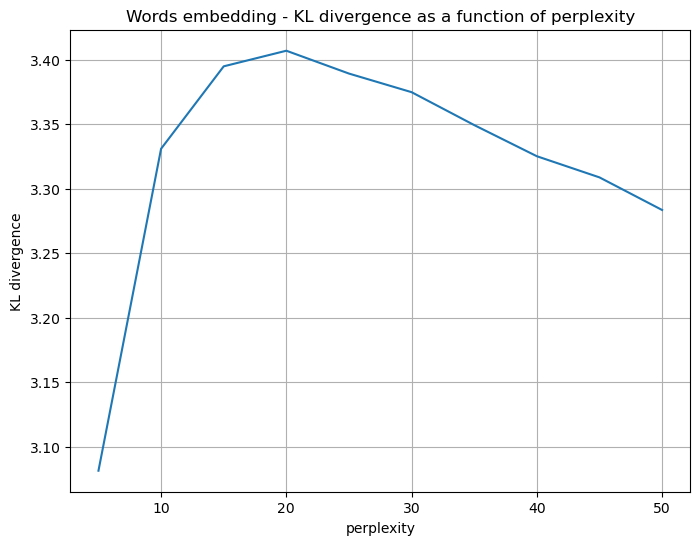

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(perplexities, kl_divergences)
plt.title('Words embedding - KL divergence as a function of perplexity')
plt.xlabel('perplexity')
plt.ylabel('KL divergence')
plt.grid('on')
plt.show()

## Best projection

In [18]:
tsne_best_projection = tsne_s[perplexities.index(best_perplexity)]
best_projection = embeddings[perplexities.index(best_perplexity)]

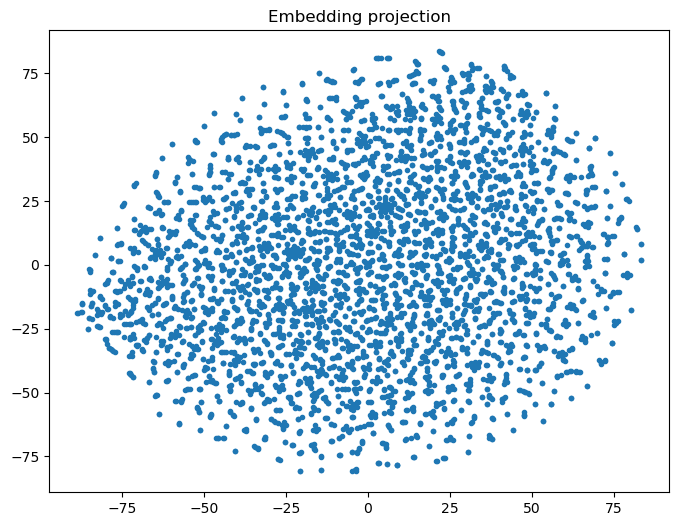

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(best_projection[:, 0], best_projection[:, 1], marker='.')
plt.title('Embedding projection')
plt.show()